<a href="https://colab.research.google.com/github/AndyMuloki/astronomical-data/blob/main/astronomical_data_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# PrepWork: Data Visualization Recap

In [ ]:
# data = pd.read_csv('./cleaned_star_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/👨🏾‍💻DS/🗃️ Projects/Astronomical Data/cleaned_star_data.csv')

In [ ]:
data.sample(7)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
47,3574,200000.0000,89.000,-5.24,4,Red,M
105,14245,231000.0000,42.000,-6.12,4,Blue,O
33,9700,74.0000,2.890,0.16,3,White,B
0,3068,0.0024,0.170,16.12,0,Red,M
132,3100,0.0080,0.310,11.17,1,Red,M
19,3441,0.0390,0.351,11.18,1,Red,M
153,16390,1278.0000,5.680,-3.32,3,Blue-White,B


In [ ]:
# data.info()

### Data Features Explained

**Categorical Features**
* Star color
* Spectral class

**Star Features**
* 0 → Brown Dwarf
* 1 → Red Dwarf
* 2 → White Dwarf
* 3 → Main Sequence
* 4 → Supergiants
* 5 → Hypergiants

### A directory to save the visualizations

In [ ]:
folder = "star_plots"
os.makedirs(folder, exist_ok=True)    # exist_ok=True => check if dir already exists; if it does, it will suppress error msg

In [ ]:
base_dir = f'/content/{folder}/'

In [ ]:
drive_folder = "plots"
# home_dir = f'/content/drive/MyDrive/👨🏾‍💻DS/🗃️ Projects/Astronomical Data/{drive_folder}/'

### Visualize the count of stars

The count of stars that belong to the different star features

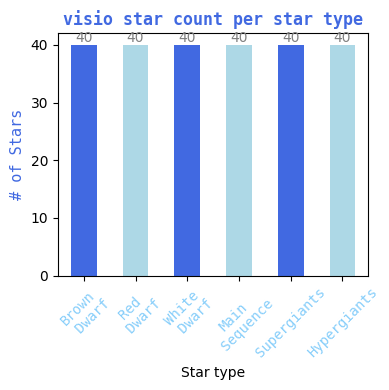

In [ ]:
plt.figure(figsize=(4, 4))

# set graph theme
# plt.style.use("dark_background")
plt.style.use("default")
ax = data['Star type'].value_counts().plot(kind='bar', color=['royalblue', 'lightblue', 'royalblue', 'lightblue', 'royalblue', 'lightblue'])
ax.bar_label(ax.containers[0], color='grey')

# set font
hfont = {'fontname':'monospace'}

plt.title("visio star count per star type", color='royalblue', weight='bold', **hfont)
plt.ylabel('# of Stars', color='royalblue', fontsize=11, **hfont)
plt.xticks(ticks=[0,1,2,3,4,5],
           labels=['Brown\n Dwarf', 'Red\n Dwarf', 'White\n Dwarf', 'Main\n Sequence', 'Supergiants', 'Hypergiants'],
           rotation=45, color='lightskyblue', **hfont)

plt.tight_layout()
# plt.savefig(base_dir+'barplot_strcount.png')
# plt.savefig(home_dir+'barplot_starcount.png')

plt.show()

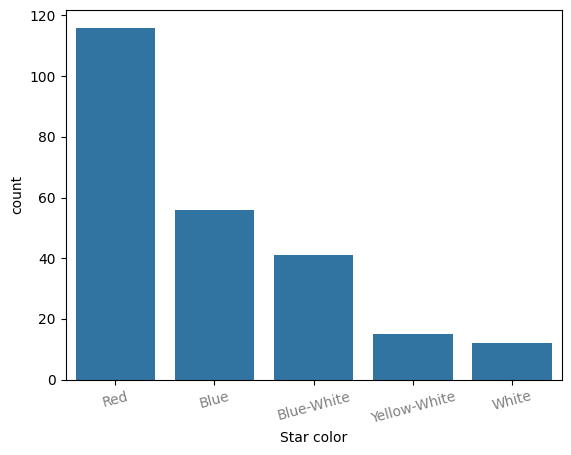

<Figure size 1400x700 with 0 Axes>

In [ ]:
# visualizing using seaborn

sns.barplot(x=data['Star color'].value_counts().index,
            y=data['Star color'].value_counts())
plt.xticks(rotation=15, color='grey')
plt.figure(figsize=(14,7))
plt.show()

### Visualize outliers in the data using boxplots

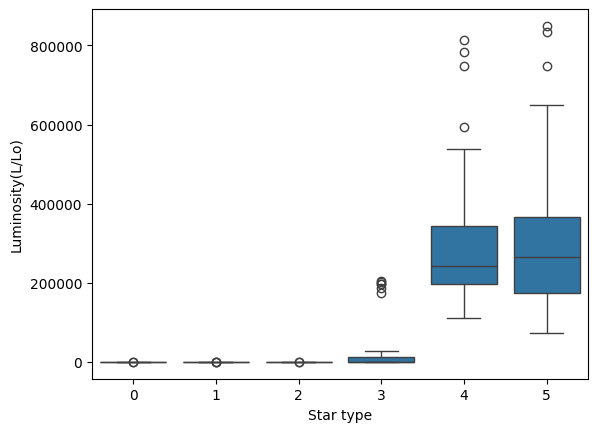

<Figure size 1200x700 with 0 Axes>

In [ ]:
# SIMPLE BOX PLOT

sns.boxplot(x=data['Star type'], y=data.iloc[:, 1])
plt.figure(figsize=(12,7))
plt.show()

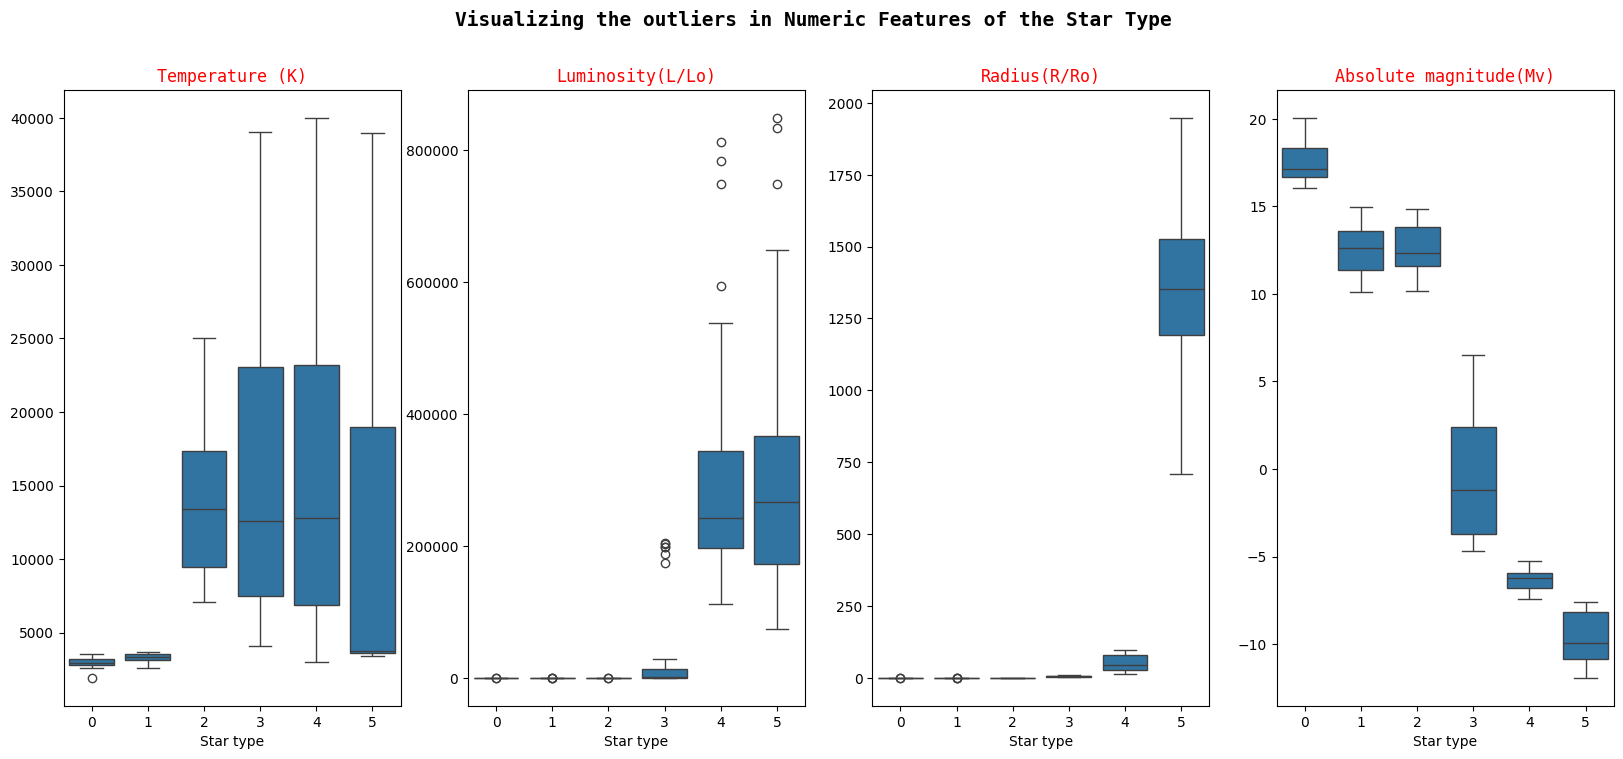

In [ ]:
# Visualize outliers in the star types using box sub plots

plt.figure(figsize=(20,8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric Features of the Star Type',
             color='black', weight='bold', fontsize=14, **hfont)

for i in range(4):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x=data['Star type'], y=data.iloc[:, i])
    plt.title(data.columns[i], color='red', **hfont)
    plt.ylabel('')

# plt.savefig(home_dir+'boxplot_star_type.png')

### Create Lineplots

In [ ]:
# function defining the line plot

def line_subplot(data, colors, i):
    """
        explain what the function does...
    """
    plt.subplot(4, 1, i+1)
    plt.plot(data.iloc[:,i], color=colors[i])
    plt.title(data.columns[i], color='red', **hfont)

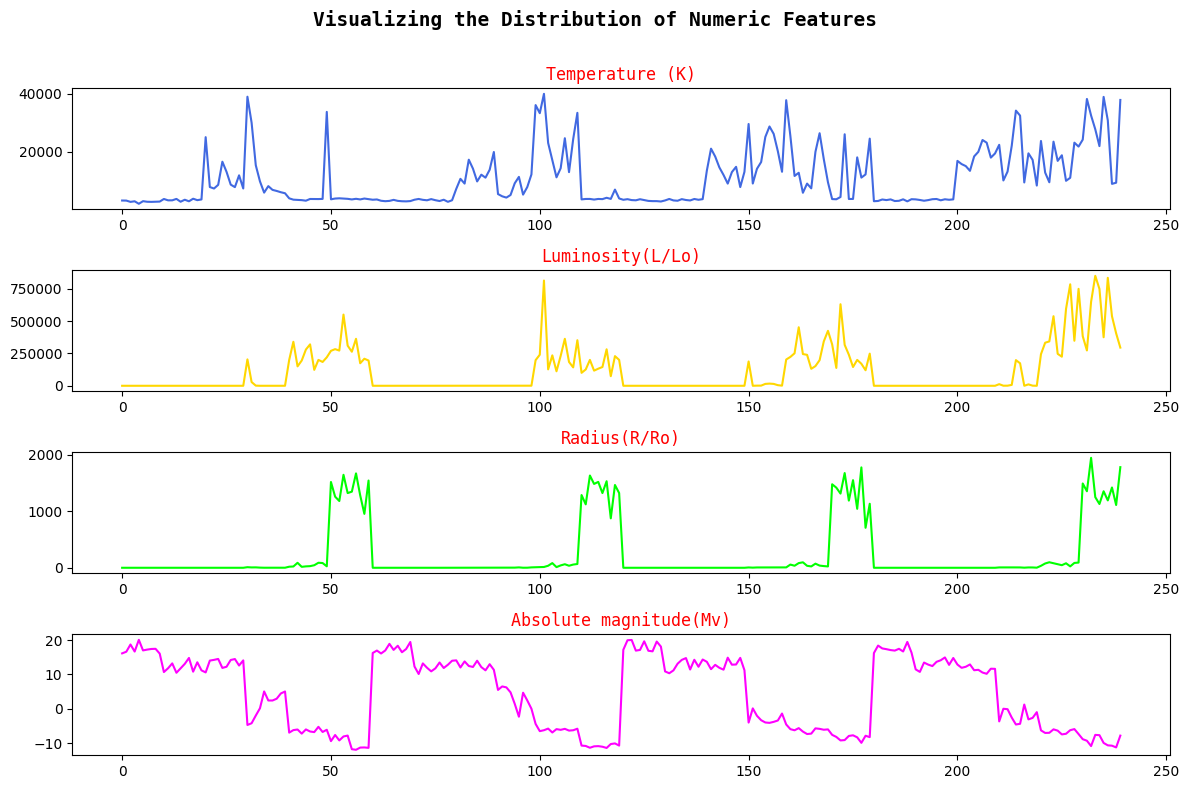

In [ ]:
plt.figure(figsize=(12,8))
plt.suptitle('Visualizing the Distribution of Numeric Features\n', color='black', **hfont, fontsize=14, weight='bold')

colors = ['royalblue', 'gold', 'lime', 'magenta']

for i in range(4):
    line_subplot(data, colors, i)

plt.tight_layout()
# plt.savefig(base_dir+'line_subplot.png')
# plt.savefig(home_dir+'line_subplot.png')
plt.show()

### Pair plots


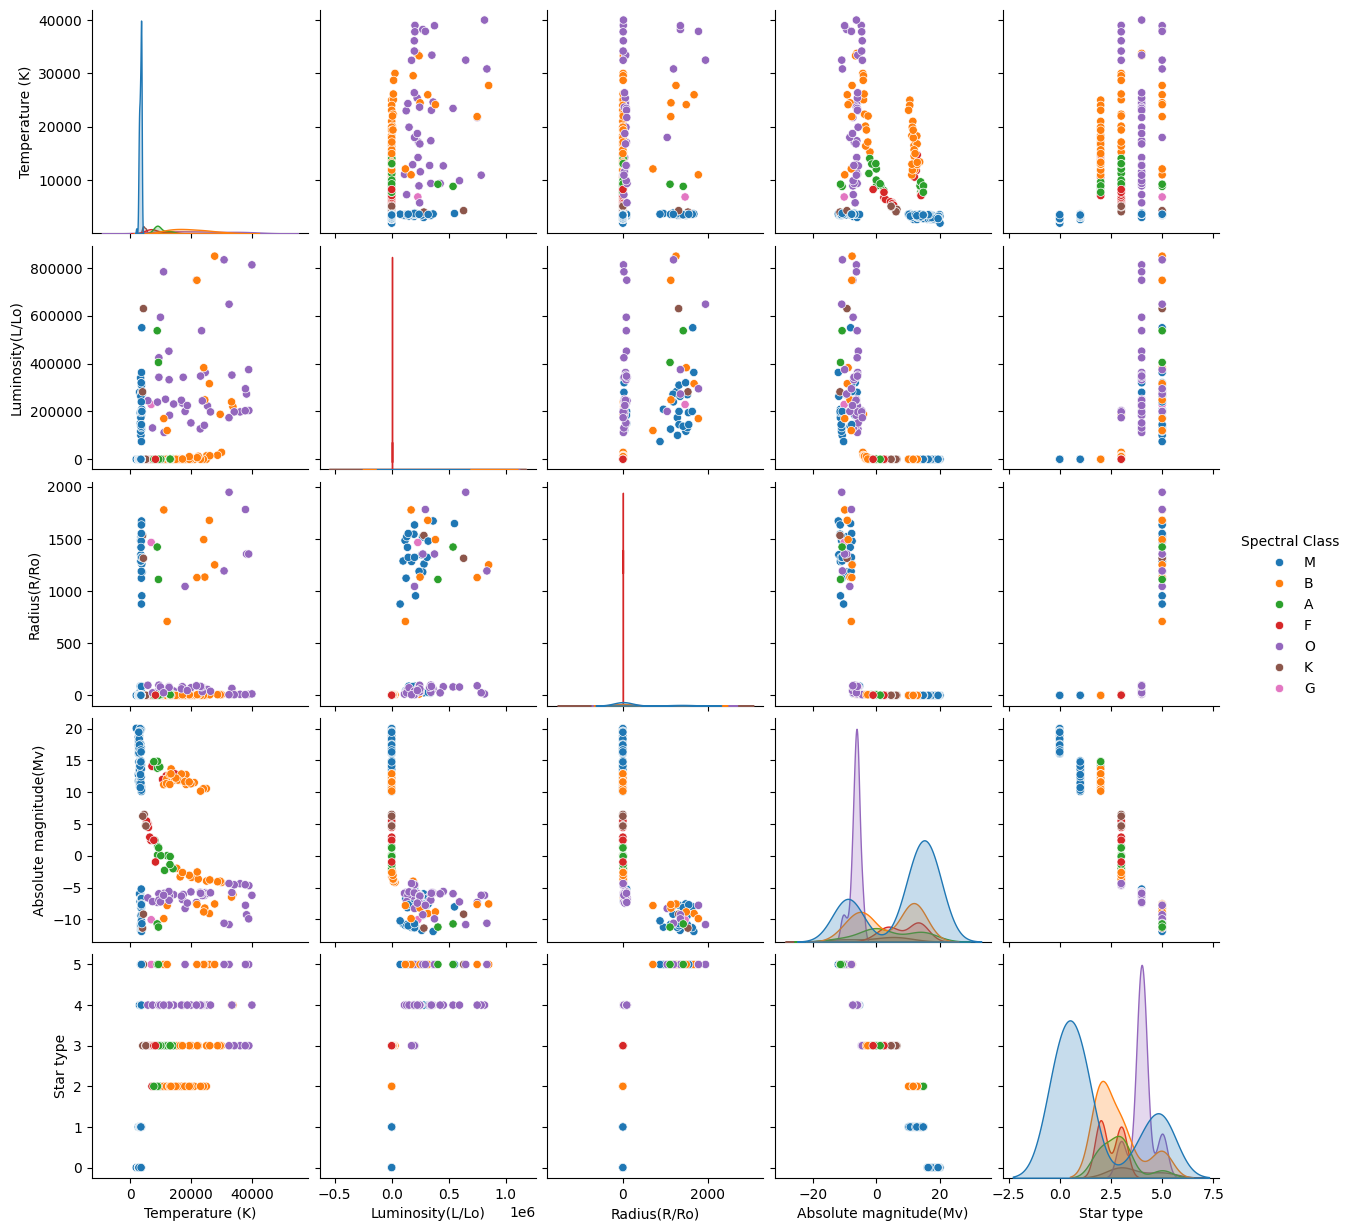

In [ ]:
# Pairplot - scatter plot

sns.pairplot(data, hue='Spectral Class')
plt.savefig(home_dir+'pairplot.png')
plt.show()

### Scatter Plot of HR Diagram

**Star Features**
* 0 → Brown Dwarf
* 1 → Red Dwarf
* 2 → White Dwarf
* 3 → Main Sequence
* 4 → Supergiants
* 5 → Hypergiants

In [ ]:
# DICTIONARY

star_type = data['Star type'].values
temperature = data['Temperature (K)'].values
abs_mag = data['Absolute magnitude(Mv)'].values


"""
    This is a dictionary within a dictionary
    The first dictionary being the key => {value} pair of; star_types = {}
    The next being within => 0: {'label': 'Brown Dwarf', ...}
"""

star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'},
}

In [ ]:
star_types[1]['marker']

'.'

In [ ]:
star_types[star_type[100]]['label']

'Supergiants'

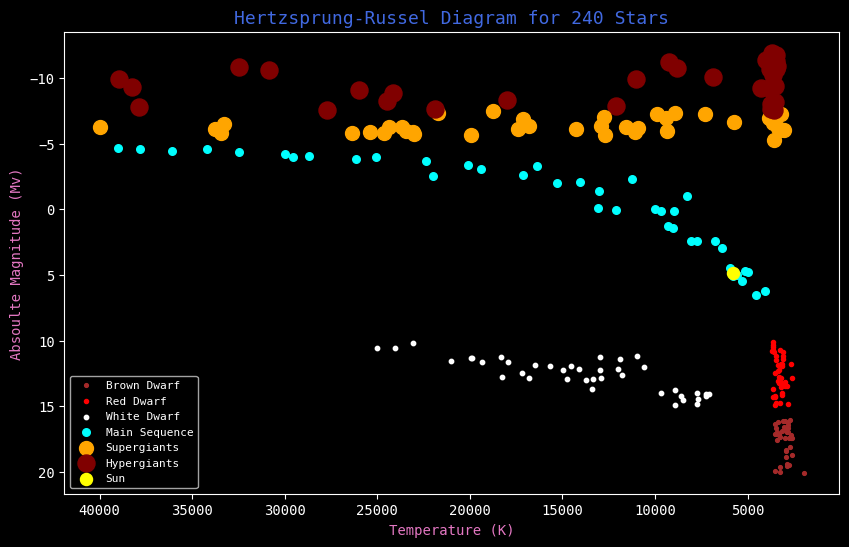

In [ ]:
plt.style.use('dark_background')

axes = []
labels = set()

plt.figure(figsize=(10, 6))

"""
    a set does not output duplicate values, so we use it for the legend in the plot-
    so as not to output the 'label' more than once
"""

for i in range(len(star_type)):
    properties = star_types[star_type[i]]

    if properties['label'] not in labels:
        ax = plt.scatter(temperature[i], abs_mag[i],
                    s=properties['size'],
                    c=properties['color'],
                    marker=properties['marker'],
                    label=properties['label'])
        axes.append(ax)
        labels.add(properties['label'])
    else:
        plt.scatter(temperature[i], abs_mag[i],
                    s=properties['size'],
                    c=properties['color'],
                    marker=properties['marker'],
                    label=properties['label'])

# Adding data for the Sun
ax_sun = plt.scatter(5778, 4.83, s=75, c='yellow', marker='o', label='Sun')
axes.append(ax_sun)
labels.add("Sun")


# Add title
plt.title(f"Hertzsprung-Russel Diagram for {len(star_type)} Stars", fontsize=13, color="royalblue", **hfont)

# Add labels
plt.ylabel("Absoulte Magnitude (Mv)", fontsize=10, color='tab:pink', **hfont)
plt.xlabel("Temperature (K)", fontsize=10, color='tab:pink', **hfont)

plt.rcParams['font.family'] = 'monospace' # sets the font for the entire plot diagram, the title and axis titles
plt.legend(handles=axes, fontsize=8)


plt.gca().invert_xaxis()        # gca() -> get axis method
plt.gca().invert_yaxis()

# plt.savefig(home_dir+'hr_diagram.png')

plt.show()